In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("VIRGINIA_RECHARGE_20221115.csv",on_bad_lines="skip")
data['num']=data.index+1
data

,MSISDN,EVT_BEGIN_DT,PYMT_AMT,num
0,5450001862,31-AUG-22,29.0,1
1,5665939873,31-AUG-22,20.0,2
2,7204561708,31-AUG-22,29.0,3
3,1919609632,31-AUG-22,109.0,4
4,2337574762,31-AUG-22,20.0,5
...,...,...,...,...
1008844,7053384810,31-OCT-22,20.0,1008845
1008845,4570694665,31-OCT-22,25.0,1008846
1008846,4570694665,31-OCT-22,20.0,1008847
1008847,4364792010,31-OCT-22,59.0,1008848


In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from lifetimes.plotting import *
from lifetimes.utils import *

In [4]:

df = data[['num', 'MSISDN', 'EVT_BEGIN_DT', 'PYMT_AMT']]
df.MSISDN = df.MSISDN.astype('object')

df.nunique()

datar = summary_data_from_transaction_data(df, 'MSISDN', 'EVT_BEGIN_DT',
                         monetary_value_col='PYMT_AMT',
                         observation_period_end='31-OCT-22')
datar.sort_values('monetary_value').head()




,frequency,recency,T,monetary_value
MSISDN,,,,
9999986062,0.0,0.0,36.0,0.0
9008005538,0.0,0.0,35.0,0.0
2762646765,0.0,0.0,48.0,0.0
6846948650,0.0,0.0,8.0,0.0
881542476,0.0,0.0,25.0,0.0


<AxesSubplot:ylabel='Frequency'>

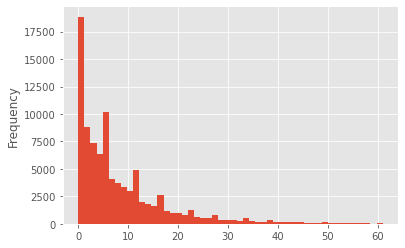

In [5]:
datar['frequency'].plot(kind='hist',bins=50)

<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

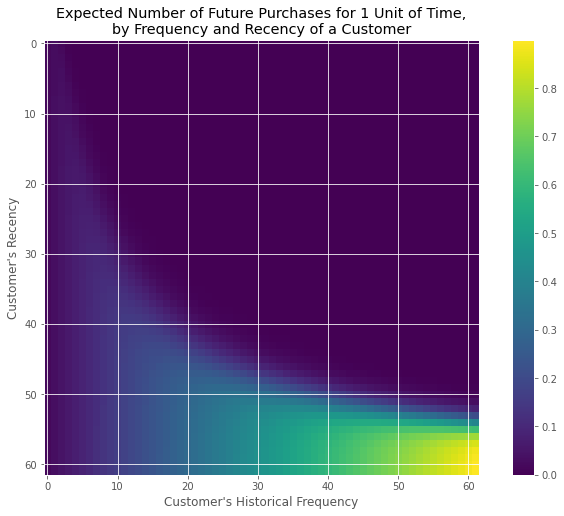

In [6]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(datar['frequency'], datar['recency'], datar['T'],tol=1e-4)
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

In [7]:
#!pip install lifetimes

,frequency,recency,T,monetary_value,predicted_purchases,p_alive,churn,predicted_Sales,LTV
MSISDN,,,,,,,,,
2202505230,25.0,58.0,61.0,224.560000,33.143955,0.994982,not churned,223.943164,7277.246777
829815402,11.0,51.0,56.0,442.272727,16.933009,0.995755,not churned,438.851342,7285.363238
2992759090,9.0,55.0,59.0,564.444444,13.597168,0.997051,not churned,558.884153,7450.143368
8354830438,1.0,1.0,4.0,500.000000,16.656242,0.996990,not churned,460.161955,7514.428828
7925821143,36.0,60.0,60.0,163.611111,47.317554,0.998434,not churned,163.356714,7578.910311
85953282,25.0,61.0,61.0,240.480000,33.258895,0.998433,not churned,239.797611,7819.475596
1365247585,8.0,49.0,54.0,612.000000,13.260011,0.996584,not churned,605.146918,7866.811146
2145146746,1.0,11.0,15.0,1000.000000,8.801547,0.997577,not churned,913.320483,7880.849135
2213792708,5.0,53.0,61.0,1040.000000,8.100554,0.996605,not churned,1020.449386,8103.862727


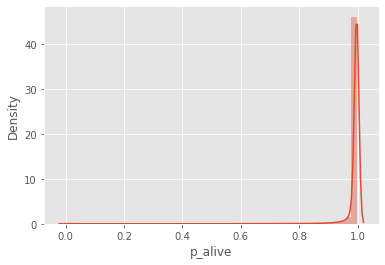

In [8]:
import seaborn as sns
import datetime as dt
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter()
data2 = datar[datar['frequency'] > 0]
ggf.fit(frequency = data2['frequency'], monetary_value = data2['monetary_value'])
t = 90
data2['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data2['frequency'], data2['recency'], data2['T'])
 
 
# Calculate probability of being currently alive and assign to each CustomerID
data2['p_alive'] = bgf.conditional_probability_alive(data2['frequency'], data2['recency'], data2['T'])
 
 
sns.distplot(data2['p_alive']);
 
 
data2['churn'] = ['churned' if p_alive < 0.5 else
                            'not churned' for p_alive in data2['p_alive']]
data2['churn'][(data2['p_alive'] >= 0.5) & (data2['p_alive'] < 0.75)] = "high risk"
data2['churn'].value_counts()
 
 
# After applying Gamma-Gamma model, now we can estimate average transaction value for each customer over his/her lifetime
data2['predicted_Sales'] = ggf.conditional_expected_average_profit(data2['frequency'], data2['monetary_value'])
 
 
# calculate LTV for each customer over the next 12 months with an assumed monthly discount rate of 0.01%
data2['LTV'] = ggf.customer_lifetime_value(
    bgf, 
    data2['frequency'], data2['recency'], data2['T'], data2['monetary_value'],
    time = 3, # number of months to predict LTV for
    discount_rate = 0.01 # monthly discount rate ~ 12.7% annually
)
 
 
# identify our top 20 customers based on LTV
best_projected_cust_LTV = data2.sort_values('LTV').tail(20)
best_projected_cust_LTV

In [13]:
data_m=pd.read_csv("VIRGINIA_MSTR_20221115.csv",on_bad_lines="skip")
data_m=data_m.drop(["VOL_KB_ALL","MODEL","SOFTWARE_OS_NAME","LAC","SITENAME","SUBS_ALL_90D","MULTI_SIM",
                "SUBS_ALL_30D","SUBS_DU_90D","SUBS_DU_30D","SIM_TYPE","TERRITORY","VOL_KB","MO_MOU","MO_ON_MOU","MO_OFF_MOU","MMS_REV"
                 ,"VAS_REV","IR_REV","AREA",'VOICEREV_SELF','HANDSET_TYPE','BRAND','JOINING_DATE','CELL','MONTH_KEY'],axis=1)
data5=data_m.drop(['REGION','RG'],axis=1)

In [14]:
data5=data5.groupby('MSISDN').sum()
data5

,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,MIXED_BUNDLE_REV,VOICEREV_USG,VOICEREV_ALL_BUNDLE,VOICEREV_MIXBUNDLE,VOICEREV_RET,VOICEREV_TRIG,...,DATAREV_RET,DATAREV_TRIG,DATAREV_SC,RECHARGE_CNT,RECHARGE_AMOUNT,RECHARGE_MAX,RG_DAYS,VOL_KB_3MNTH,DATA_RG_DAYS,VOICE_RG_DAYS
MSISDN,,,,,,,,,,,,,,,,,,,,,
3771,2011.48,44.98,1966.50,0.00,0.00,44.98,0.00,0.00,0.0,0.00,...,374.48,1571.49,20.25,8,2640.0,2094.0,92,5.340439e+08,92,7
99723,1276.56,1276.56,0.00,0.00,0.00,0.02,1276.55,0.00,0.0,1269.80,...,0.00,0.00,0.00,27,1701.0,204.0,92,2.856928e+05,64,71
171504,1103.60,1103.10,0.00,0.50,0.00,1103.10,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,16,1438.0,327.0,92,1.407000e+01,3,92
353719,1852.67,1282.38,545.94,23.40,1206.76,601.66,680.72,636.44,0.0,44.28,...,0.00,0.00,0.00,23,2566.0,605.0,92,5.514000e+01,8,92
525641,31.05,31.05,0.00,0.00,0.00,31.05,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,4,80.0,60.0,27,1.492000e+01,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999485479,288.92,129.27,158.66,1.00,0.00,36.96,92.31,0.00,0.0,0.00,...,0.00,64.54,20.26,17,368.0,172.0,69,3.910888e+07,31,23
9999759385,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0,0.0,0.0,2,0.000000e+00,0,0
9999772064,572.11,275.92,162.72,133.45,31.52,121.97,153.95,16.62,0.0,0.00,...,0.00,0.00,6.75,18,757.0,230.0,80,5.408599e+07,72,32


In [15]:

data_final=data_m.drop(list(data5),axis=1)
data_final=data_final.drop_duplicates(subset=['MSISDN']).sort_values('MSISDN')
data_final.reset_index(drop=True,inplace=True)
data5.reset_index(inplace=True,drop=True)
data_final = pd.concat([data5,data_final], axis=1)
data_final


,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,MIXED_BUNDLE_REV,VOICEREV_USG,VOICEREV_ALL_BUNDLE,VOICEREV_MIXBUNDLE,VOICEREV_RET,VOICEREV_TRIG,...,VOL_KB_3MNTH,DATA_RG_DAYS,VOICE_RG_DAYS,MSISDN,RG,REGION,PRICE_PLAN,PRODUCT_TYPE,HS_CONN,HS_TYPE
0,2011.48,44.98,1966.50,0.00,0.00,44.98,0.00,0.00,0.0,0.00,...,5.340439e+08,92,7,3771,RG,DHAKA NORTH,NISHCHINTO,PRP,4G,SMARTPHONE 4G
1,1276.56,1276.56,0.00,0.00,0.00,0.02,1276.55,0.00,0.0,1269.80,...,2.856928e+05,64,71,99723,RG,MYMENSINGH,BONDHU,PRP,4G,SMARTPHONE 4G
2,1103.60,1103.10,0.00,0.50,0.00,1103.10,0.00,0.00,0.0,0.00,...,1.407000e+01,3,92,171504,RG,RANGPUR,DJUICE_ADJUSTED,PRP,2G,BASIC-DATA CAPABLE
3,1852.67,1282.38,545.94,23.40,1206.76,601.66,680.72,636.44,0.0,44.28,...,5.514000e+01,8,92,353719,RG,DHAKA SOUTH,NISHCHINTO,PRP,BASIC,BASIC-DATA CAPABLE
4,31.05,31.05,0.00,0.00,0.00,31.05,0.00,0.00,0.0,0.00,...,1.492000e+01,7,11,525641,RG,FARIDPUR,NISHCHINTO,PRP,2G,BASIC-DATA CAPABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99483,288.92,129.27,158.66,1.00,0.00,36.96,92.31,0.00,0.0,0.00,...,3.910888e+07,31,23,9999485479,RG,MYMENSINGH,PREPAID SMILE PSTN,PRP,3G,SMARTPHONE
99484,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.000000e+00,0,0,9999759385,0,RANGPUR,NISHCHINTO,PRP,BASIC,BASIC-VOICE ONLY
99485,572.11,275.92,162.72,133.45,31.52,121.97,153.95,16.62,0.0,0.00,...,5.408599e+07,72,32,9999772064,RG,DINAJPUR,DJUICE_ADJUSTED,PRP,4G,SMARTPHONE 4G
99486,119.92,119.42,0.00,0.50,0.00,119.42,0.00,0.00,0.0,0.00,...,3.493000e+01,0,29,9999804576,RG,RAJSHAHI,DJUICE_ADJUSTED,PRP,BASIC,BASIC-VOICE ONLY


In [16]:
#data_final.to_csv('data_final.csv',index=False)

In [22]:
data_compare1=pd.read_csv("id_with_1ormore_freq.csv",on_bad_lines="skip")
data_compare1
data_compare2 = pd.concat([data_final, data_compare1, data_compare1]).drop_duplicates(subset='MSISDN',keep=False)
data_compare2


,TOTAL_DSTR,VOICEREV_TOTAL,DATAREV_TOTAL,SMSREV_TOTAL,MIXED_BUNDLE_REV,VOICEREV_USG,VOICEREV_ALL_BUNDLE,VOICEREV_MIXBUNDLE,VOICEREV_RET,VOICEREV_TRIG,...,VOL_KB_3MNTH,DATA_RG_DAYS,VOICE_RG_DAYS,MSISDN,RG,REGION,PRICE_PLAN,PRODUCT_TYPE,HS_CONN,HS_TYPE
5,1.38,1.38,0.00,0.00,0.0,1.38,0.00,0.0,0.0,0.0,...,2033.30,10,1,559381,RG,MYMENSINGH,NISHCHINTO,PRP,4G,SMARTPHONE 4G
12,11.96,11.96,0.00,0.00,0.0,11.96,0.00,0.0,0.0,0.0,...,0.00,0,1,1914946,RG,BARISHAL,NISHCHINTO,PRP,BASIC,BASIC-VOICE ONLY
19,20.57,19.32,0.75,0.50,0.0,19.32,0.00,0.0,0.0,0.0,...,1031.10,3,4,2581652,RG,DINAJPUR,DJUICE_ADJUSTED,PRP,4G,SMARTPHONE 4G
23,58.59,54.59,0.00,0.00,0.0,20.82,33.77,0.0,0.0,0.0,...,307.60,43,11,2728885,RG,DHAKA CENTRAL,NISHCHINTO,PRP,2G,BASIC-DATA CAPABLE
24,37.63,37.63,0.00,0.00,0.0,37.63,0.00,0.0,0.0,0.0,...,3.45,3,4,2764170,RG,KHULNA,NISHCHINTO,PRP,2G,BASIC-DATA CAPABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99454,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,...,170.66,1,0,9995884329,RG,MYMENSINGH,SKITTO,PRP,UNKNOWN,UNKNOWN
99474,27.38,27.13,0.00,0.25,0.0,27.13,0.00,0.0,0.0,0.0,...,154.76,20,7,9997787909,RG,RANGPUR,NISHCHINTO,PRP,2G,BASIC-DATA CAPABLE
99476,67.66,67.66,0.00,0.00,0.0,67.66,0.00,0.0,0.0,0.0,...,0.66,1,25,9998301418,RG,FARIDPUR,NISHCHINTO,PRP,BASIC,BASIC-VOICE ONLY
99484,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,...,0.00,0,0,9999759385,0,RANGPUR,NISHCHINTO,PRP,BASIC,BASIC-VOICE ONLY


In [23]:
#data_compare2.to_csv('id_with_0orless_freq.csv',index=False)